<a href="https://colab.research.google.com/github/ArunitaYen/Classification_Hyperparameter/blob/main/Damaged_Crop_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data source:

In [1]:
#references: 
# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
#

In [2]:
# 1.1 Call libraries

## A. Data manipulation
import numpy as np
import pandas as pd

# 1.2 for data splitting
from sklearn.model_selection import train_test_split

## B. Transformers for predictors:

# 1.3 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder as onehot

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder

## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.10 To plot graphs and pipeline diagram
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import set_config

In [3]:
# Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Mount google drive:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
path = "/gdrive/MyDrive/crop classification/agriculture.csv"

In [26]:
crop = pd.read_csv(path)

Data exploration

In [27]:
#ID: UniqueID Estimated_Insects_Count: Estimated insects count per square meter Crop_Type: Category of Crop(0,1) 
#Soil_Type: Category of Soil (0,1) Pesticide_Use_Category: Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using) 
#Number_Doses_Week: Number of doses per week Number_Weeks_Used: Number of weeks used 
#Number_Weeks_Quit: Number of weeks quit Season: Season Category (1,2,3) 
#Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)


crop.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [8]:
#checking the shape of the dataset
crop.shape  #(rows = 89000, cols = 10)

(88858, 10)

In [9]:
#checking null values in the dataset
crop.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [10]:
#checking the rows having null values to check the pattern if any
df = crop[crop.isna().any(axis=1)]
df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88786,F00155793,1785,1,0,2,60,NaN,16,2,0
88788,F00155801,1898,1,0,2,15,NaN,3,1,0
88825,F00155882,2542,1,0,2,10,NaN,21,2,0
88833,F00155899,2687,1,0,2,10,NaN,21,2,0
88838,F00155906,2840,1,0,2,20,NaN,13,1,0


In [11]:
#Crop_Type is categorical
crop["Crop_Type"].unique()

array([1, 0])

In [12]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [14]:
num_columns=['Estimated_Insects_Count','Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']
cat_columns=[ 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']

In [28]:
df_crop=crop.drop('ID', axis=1)

In [29]:
df_crop[num_columns].describe()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,88858.000000,88858.000000,79858.000000,88858.000000
mean,1399.012210,25.849952,28.623970,9.589986
std,849.048781,15.554428,12.391881,9.900631
min,150.000000,0.000000,0.000000,0.000000
25%,731.000000,15.000000,20.000000,0.000000
50%,1212.000000,20.000000,28.000000,7.000000
75%,1898.000000,40.000000,37.000000,16.000000
max,4097.000000,95.000000,67.000000,50.000000


In [16]:
#checking if target is balanced
df_crop.Crop_Damage.value_counts() #the Target is imbalanced

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


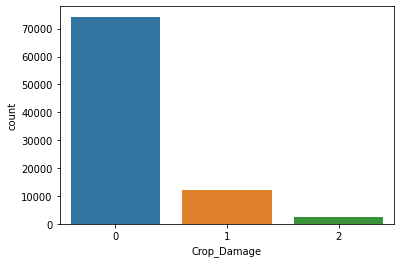

In [17]:
#plotting the target
sns.countplot(df_crop['Crop_Damage']) #the target is imbalaced

using SMOTE to oversample the data


> 
Synthetic Minority Oversampling Technique
Working of SMOTE

In [18]:
#Replacing missing values with mode of the data .
df_crop['Number_Weeks_Used'].fillna(df_crop['Number_Weeks_Used'].mean(),inplace=True)

In [19]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE( random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df_crop.drop('Crop_Damage', axis=1), df_crop['Crop_Damage'])
df_crop_os = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [20]:
#checking if target is balanced
df_crop_os.Crop_Damage.value_counts()

0    74238
1    74238
2    74238
Name: Crop_Damage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


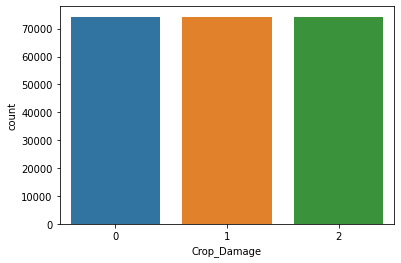

In [21]:
#plotting the target
sns.countplot(df_crop_os['Crop_Damage']) #the target is now balaced

In [22]:
df_crop_os.shape

(222714, 9)

Pipelining


> Data pre-processing and oversampling with pipeline



In [23]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [24]:
from imblearn.pipeline import Pipeline as imbpipeline

In [30]:
df_crop_n= crop
df_crop_n.drop('ID', axis=1, inplace=True)

In [170]:
df_crop_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [31]:
df_crop_n.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [32]:
#numeric pipeline, for the numeric column and imputation strategy is 'mean'
numeric_pipeline = imbpipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

#categorical pipeline for category column and imputation strategy is 'most frequent' (if any)
categorical_pipeline = imbpipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder())
])

In [33]:
#fit transform categorical columns to categorical pipeline
categorical_pipeline.fit_transform(df_crop_n[cat_columns]).toarray()

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [34]:
#fit transform numeric columns to numeric pipeline
numeric_pipeline.fit_transform(df_crop_n[num_columns])

array([[-1.42632444, -1.66191244, -2.43660084, -0.96862918],
       [-1.40159074, -1.66191244, -2.43660084, -0.96862918],
       [-1.34505657, -1.66191244, -2.43660084, -0.96862918],
       ...,
       [ 2.49337818, -0.69755139,  0.96837874, -0.16059534],
       [ 2.7124481 , -1.01900507, -0.3084886 ,  0.84944697],
       [ 2.93976258, -0.3760977 ,  0.71300527, -0.26159957]])

In [35]:
#parallel pipes for categorical and numerical columns
ct= ColumnTransformer(
    [
        ("num", numeric_pipeline, num_columns),
        ("cat", categorical_pipeline, cat_columns)
    ]
)

In [36]:
#fit transform the dataframe
ct.fit_transform(df_crop_n)

array([[-1.42632444, -1.66191244, -2.43660084, ...,  1.        ,
         0.        ,  0.        ],
       [-1.40159074, -1.66191244, -2.43660084, ...,  0.        ,
         1.        ,  0.        ],
       [-1.34505657, -1.66191244, -2.43660084, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 2.49337818, -0.69755139,  0.96837874, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.7124481 , -1.01900507, -0.3084886 , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.93976258, -0.3760977 ,  0.71300527, ...,  0.        ,
         0.        ,  1.        ]])

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
#creating the final pipeline to oversample the data and then apply random forest classification
pt= imbpipeline([
              ("ct",ct),
              ('sm',SMOTE( random_state=42)),
              ("rf", RandomForestClassifier())
])

In [39]:
y=df_crop_n.pop('Crop_Damage')
X=df_crop_n

In [40]:
# Split dataset. We will preprocess X_train and apply that
#     processing to X_test later
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2,      # split-ratio
                                                    random_state=11)


In [41]:
f"X_train shape: {X_train.shape}"    
print()
f"X_test.shape : {X_test.shape}"     
print()
f"y_train shape: {y_train.shape}"    
print()
f"y_test shape : {y_test.shape}"

'X_train shape: (71086, 8)'

'X_test.shape : (17772, 8)'

'y_train shape: (71086,)'

'y_test shape : (17772,)'

In [42]:
#fitting the training model
pt.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Used',
                                                   'Number_Weeks_Quit']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                       

In [43]:
#predicting the crop damage
pt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


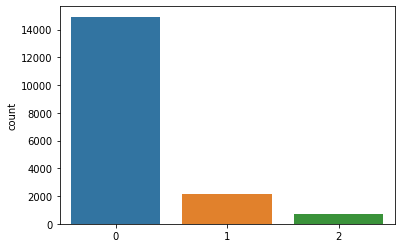

In [44]:
#plot predicted result
sns.countplot(pt.predict(X_test))

In [45]:
#y_test

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


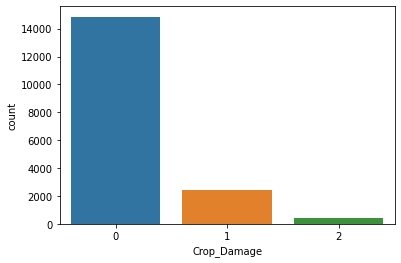

In [46]:
#plot actual result
sns.countplot(y_test)

Text(0.5, 1.0, 'Actual vs Predicted Values')

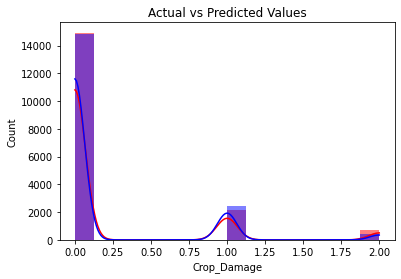

In [60]:
#plot actual and predicted values

ax = sns.histplot(pt.predict(X_test), color="r", label="PREDICTED", kde=True, linewidth = 0)
sns.histplot(y_test, color="b", label="ACTUAL", kde=True, linewidth=0)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

cross-validation

In [63]:
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [73]:
#Check the list of available parameters 
pt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'sm', 'rf', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__num', 'ct__cat', 'ct__num__memory', 'ct__num__steps', 'ct__num__verbose', 'ct__num__impute', 'ct__num__scale', 'ct__num__impute__add_indicator', 'ct__num__impute__copy', 'ct__num__impute__fill_value', 'ct__num__impute__missing_values', 'ct__num__impute__strategy', 'ct__num__impute__verbose', 'ct__num__scale__copy', 'ct__num__scale__with_mean', 'ct__num__scale__with_std', 'ct__cat__memory', 'ct__cat__steps', 'ct__cat__verbose', 'ct__cat__impute', 'ct__cat__one-hot', 'ct__cat__impute__add_indicator', 'ct__cat__impute__copy', 'ct__cat__impute__fill_value', 'ct__cat__impute__missing_values', 'ct__cat__impute__strategy', 'ct__cat__impute__verbose', 'ct__cat__one-hot__categories', 'ct__cat__one-hot__drop', 'ct__cat__one-hot__dtype', 'ct__cat__one-hot__handle_unknown', 'ct__cat__one

In [75]:
# Define dictionary
#
parameters = { 'rf__n_estimators'     :  [200,300],             # Number of trees in random forest
               'rf__max_features'     :  ['auto','sqrt'],       # Number of features to consider at every split
               'rf__max_depth'        :  [4,10],                # Maximum number of levels in tree
               'rf__min_samples_split':  [2, 5, 10],            # Minimum number of samples required to split a node
               'rf__bootstrap'        :  [True, False]          # Method of selecting samples for training each tree (WITH OR WITHOUT REPLACEMENT)
              
               }                               # Total: 2 * 2 * 2 * 3 * 2 = 48



In [81]:
#param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pt,
                           param_grid=parameters,
                           scoring = ['accuracy'],
                           cv=5,
                           n_jobs=-1,
                           verbose =1,         # Higher the value, more the verbosity
                           refit = 'accuracy'
                           )

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Estimated_Insects_Count',
                                                                          'Number_Doses_Week',
                                                                          'Number_Weeks_Used',
                                                                          'Number_Weeks_Quit']),
                                                 

Cross-validation score: 0.6823283802941353
Test score: 0.6807337384650011


In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder())
])

In [ ]:
categorical_transformer=categorical_pipeline.fit_transform(df[cat_columns])

In [ ]:
numeric_transformer=numeric_pipeline.fit_transform(df[num_columns])

In [ ]:
ct= ColumnTransformer(
    [
        ("num", numeric_pipeline, num_columns),
        ("cat", categorical_pipeline, cat_columns)
    ]
)

In [ ]:
ct.fit_transform(df)

<3730x495 sparse matrix of type '<class 'numpy.float64'>'
	with 18650 stored elements in Compressed Sparse Row format>

In [ ]:
pt= Pipeline([
              ("ct",ct),
              ("dt", DecisionTreeClassifier())
])

In [155]:
y=crop.pop('Crop_Damage')
X=crop

In [ ]:
# 4.0 Split dataset. We will preprocess X_train and apply that
#     processing to X_test later
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2      # split-ratio
                                                    )



In [ ]:
f"X_train shape: {X_train.shape}"    
print()
f"X_test.shape : {X_test.shape}"     
print()
f"y_train shape: {y_train.shape}"    
print()
f"y_test shape : {y_test.shape}"     

'X_train shape: (196872, 6)'

'X_test.shape : (49219, 6)'

'y_train shape: (196872,)'

'y_test shape : (49219,)'

In [ ]:
pt.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Crop_Year', 'Area']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder())]),
                                                  ['State_Name',
                              

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
steps_xg = [('sts', StandardScaler() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

In [ ]:
pipe_xg = Pipeline(steps_xg)

In [ ]:
pipe_xg1 = make_pipeline (StandardScaler(),
                          PCA(),
                          XGBClassifier(silent = False,
                                        n_jobs=2)
                          )

In [ ]:
pipe_xg.get_params()

{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

In [ ]:
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30]
              }                               # Total: 2 * 2 * 2 * 2


In [ ]:
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =3 ,             # No of folds
                   verbose =2,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [ ]:
import time
import os
import gc
import random

In [ ]:

gc.collect()

# 7.2. Start fitting data to pipeline
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
(end - start)/60     

771

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

ValueError: ignored